<a href="https://colab.research.google.com/github/011010110100/estatistica-aplicada-4T/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!apt-get install -y r-base
%load_ext rpy2.ipython

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.3-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [27]:
# Verificando se o R foi instalado corretamente.
%%R
x <- c(1, 2, 3, 4, 5)
mean(x)

[1] 3


In [ ]:
%%R
ini <- Sys.time()
install.packages(c('skimr', 'tidyverse'), dependencies = TRUE)
Sys.time() - ini
library(skimr)
library(tidyverse)
library(MASS)


In [5]:
%%R
# Carregando os dados e armazenando dentro da varia´vel "fifa"
url0 <- 'https://raw.githubusercontent.com/filipezabala/pucrs-tecnologo-bd/main/dados/Anexo_Projeto_fifa_world_national_teams_versa%CC%83o_oficial%2020241.csv'
fifa <- read.csv(url0, sep = ';')
head(str(fifa))

'data.frame':	718 obs. of  30 variables:
 $ id                           : int  158023 153079 211110 201399 226226 199667 212616 216816 183892 231478 ...
 $ name                         : chr  "Messi" "Aguero" "Dybala" "Icardi" ...
 $ full_name                    : chr  "Lionel Andr\xe9s Messi Cuccittini" "Sergio Leonel Ag\xfcero del Castillo" "Paulo Bruno Exequiel Dybala" "Mauro Emanuel Icardi Rivero" ...
 $ overall_rating               : int  94 89 89 87 82 77 77 78 79 79 ...
 $ value_euro                   : int  110500000 64500000 89000000 64500000 30000000 8500000 12000000 15000000 8500000 18000000 ...
 $ wage_euro                    : int  565000 300000 205000 130000 83000 28000 27000 53000 19000 54000 ...
 $ nationality                  : chr  "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ national_team                : chr  "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ club_team                    : chr  "FC Barcelona" "Manchester City" "Juventus" "Inter" ...
 

# 1. Encontre e liste uma variável de cada tipo (qualitativa nominal, qualitativa ordinal, quantitativa discreta e quantitativa contínua);

In [6]:
%%R
# Função genérica para exibir informações de variáveis
exibir_informacoes <- function(variavel, tipo) {
  cat(tipo, ":\n")
  print(head(variavel, 4))  # Apenas as 4 primeiras linhas
  cat("------------------------------------------------------------------\n")
}

exibir_informacoes(fifa$club_team,   "Qualitativa Nominal (club_team)")
exibir_informacoes(fifa$skill_moves, "Qualitativa Ordinal (skill_moves)")
exibir_informacoes(fifa$age,         "Quantitativa Discreta (age)")
exibir_informacoes(fifa$height_cm,   "Quantitativa Contínua (height_cm)")


Qualitativa Nominal (club_team) :
[1] "FC Barcelona"    "Manchester City" "Juventus"        "Inter"          
------------------------------------------------------------------
Qualitativa Ordinal (skill_moves) :
[1] 4 4 4 3
------------------------------------------------------------------
Quantitativa Discreta (age) :
[1] 31 30 25 26
------------------------------------------------------------------
Quantitativa Contínua (height_cm) :
[1] 170 173 152 155
------------------------------------------------------------------


# 2. Tabelas de frequência para duas variáveis qualitativas;

In [7]:

%%R
# Função genêrica que criará as tabelas de frequência para qualquer coluna passada por argumento.
criar_tabela_frequencia <- function(df, coluna) {
  tabela <- as.data.frame(table(df[[coluna]]))
  colnames(tabela) <- c(coluna, "Frequency")
  # Ordenando a tabela com base na frequência.
  tabela <- tabela %>% arrange(desc(Frequency))
  return(tabela)
}

# Para ver a tabela completa, basta tirar o head().
print(head(criar_tabela_frequencia(fifa, "nationality")))
print(head(criar_tabela_frequencia(fifa, "club_team")))


  nationality Frequency
1      Brazil        23
2     Denmark        23
3     England        23
4      France        23
5     Germany        23
6 Netherlands        23
          club_team Frequency
1 FC Bayern Munchen        14
2          Juventus        14
3 Tottenham Hotspur        14
4            Celtic        12
5 Manchester United        12
6   Atletico Madrid        11


# 3. Uma tabela com medidas de posição e variabilidade para ao menos 5 variáveis a serem escolhidas;

##### **medidas de posição**: Média, Mediana, Moda, Quartis
##### **medidas de Variabilidade**: Amplitude, Variância, Desvio Padrão, Coeficiênte de Variação, IQR

In [22]:
# 3.1 MEDIDAS DE POSIÇÃO (Média, Mediana, Moda, Quartis)

# Como não descobri uma forma mais simples de calcular a moda, utilizei uma documentação que apresentou essa função.
# Ref. https://www.tutorialspoint.com/r/r_mean_median_mode.htm
%%R
calcula_moda <- function(v) {
   uniqv <- unique(v)
   # tabulate -> calcula as freq. e o which.max pega a maior.
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Definindo as 5 variáveis para serem feita as análises.
variaveis <- c("age", "overall_rating", "height_cm", "weight_kgs", "strength")

# Função para calcular o resumo estatístico por nacionalidade
medidas_posicao <- function(df, variaveis, linhas_tabela) {
  resumo <- list()
  for (var in variaveis) {
    resumo[[var]] <- df %>%
      # Agrupando por nacionalidade, para melhor entendimento dos dados.
      group_by(.data[["nationality"]]) %>%
      summarise(
            media   = mean(.data[[var]]),
            mediana = median(.data[[var]]),
            moda    = calcula_moda (.data[[var]]),
            Q1      = quantile(.data[[var]], 0.25),
            Q2      = quantile(.data[[var]], 0.50),
            Q3      = quantile(.data[[var]], 0.75),
      ) %>%
      # limitando o tamanho do retorno para facilitar a visualização.
      slice_head(n = linhas_tabela)
  }
  return(resumo)
}

library(knitr)
resultado <- medidas_posicao(fifa, variaveis, 5)

for (var in names(resultado)) {
  cat("\n### Medidas de Posição para:", var)
  print(kable(resultado[[var]]))
}


### Medidas de Posição para: age

|nationality |    media| mediana| moda| Q1| Q2|    Q3|
|:-----------|--------:|-------:|----:|--:|--:|-----:|
|Argentina   | 26.82353|      27|   31| 24| 27| 30.00|
|Australia   | 27.07692|      26|   26| 26| 26| 28.00|
|Austria     | 26.18750|      26|   26| 24| 26| 28.25|
|Belgium     | 27.31579|      27|   26| 25| 27| 30.00|
|Brazil      | 30.47826|      31|   31| 27| 31| 31.00|

### Medidas de Posição para: overall_rating

|nationality |    media| mediana| moda| Q1| Q2|    Q3|
|:-----------|--------:|-------:|----:|--:|--:|-----:|
|Argentina   | 82.11765|      80|   80| 79| 80| 84.00|
|Australia   | 72.30769|      73|   72| 71| 73| 74.00|
|Austria     | 77.18750|      77|   75| 75| 77| 78.25|
|Belgium     | 83.42105|      83|   87| 79| 83| 87.00|
|Brazil      | 79.82609|      79|   79| 78| 79| 82.00|

### Medidas de Posição para: height_cm

|nationality |    media| mediana| moda|     Q1|  Q2|  Q3|
|:-----------|--------:|-------:|----:|------:|---

In [16]:
# 3.2 medidas de Variabilidade: Amplitude, Variância, Desvio Padrão, Coeficiênte de Variação, IQR

%%R
library(knitr)

# Função para calcular as medidas de variabilidade
calcular_variabilidade <- function(df, variaveis) {
  resumo_variabilidade <- list()
  for (var in variaveis) {
    resumo_variabilidade[[var]] <- df %>%
      group_by(.data[["nationality"]]) %>%
      summarise(
        Amplitude = max(.data[[var]]) - min(.data[[var]]),
        Variancia = var(.data[[var]]),
        Desvio_Padrao = sd(.data[[var]]),
        Coeficiente_Variacao = (sd(.data[[var]]) / mean(.data[[var]])) * 100,
        IQR = IQR(.data[[var]])
      ) %>%
      slice_head(n = 5)
  }
  return(resumo_variabilidade)
}

# Definindo as variáveis para as análises
variaveis_variabilidade <- c("age", "overall_rating", "height_cm", "weight_kgs", "strength")
variabilidade_resultado <- calcular_variabilidade(fifa, variaveis_variabilidade)

# Exibindo as tabelas + Título para saber qual o parâmetro.
for (var in names(variabilidade_resultado)) {
  cat("\n### Medidas de Variabilidade para:", var)
  print(kable(variabilidade_resultado[[var]]))
}



### Medidas de Variabilidade para: age

|nationality | Amplitude| Variancia| Desvio_Padrao| Coeficiente_Variacao|  IQR|
|:-----------|---------:|---------:|-------------:|--------------------:|----:|
|Argentina   |        11| 11.529412|      3.395499|            12.658658| 6.00|
|Australia   |        12| 11.910256|      3.451124|            12.745628| 2.00|
|Austria     |         9|  7.362500|      2.713393|            10.361404| 4.25|
|Belgium     |        12| 10.561404|      3.249831|            11.897263| 5.00|
|Brazil      |         8|  9.169961|      3.028194|             9.935587| 4.00|

### Medidas de Variabilidade para: overall_rating

|nationality | Amplitude| Variancia| Desvio_Padrao| Coeficiente_Variacao|  IQR|
|:-----------|---------:|---------:|-------------:|--------------------:|----:|
|Argentina   |        17| 23.485294|      4.846163|             5.901488| 5.00|
|Australia   |        15| 16.730769|      4.090326|             5.656834| 3.00|
|Austria     |        10|  

# 4. Ao menos dois gráficos criativos para ajudar na visualização de resultados, conforme orientações dadas em aula pelo professor Hélio;

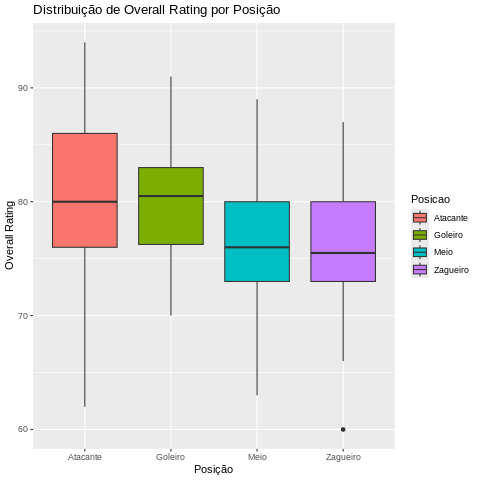

In [54]:
# 4.1 - Primeiro gráfico, comparando overall_rating por cada posição (atacante, goleiro, medio, zagueiro)
%%R
fifa %>%
  # pivot_longer -> transforma colunas em linhas; names_to => nova coluna
  pivot_longer(cols = c(Goleiro, Zagueiro, Meio, Atacante), names_to = "Posicao", values_to = "Valor") %>%
  # quanto a posição == 1 indica que o jogador atua naquela posição. Logo vamos filtrar todos que possuam 1
  filter(Valor == 1) %>%

  # Criando o gráfico
  # aes -> aesthetics; definição da estética do gráfico.
  ggplot(aes(x = Posicao, y = overall_rating, fill = Posicao)) +
  # Adicionando o boxplot para cada overal_rating por posição
  geom_boxplot() +
  # Adicionando títulos e rótulos.
  labs(title = "Distribuição de Overall Rating por Posição", x = "Posição", y = "Overall Rating")

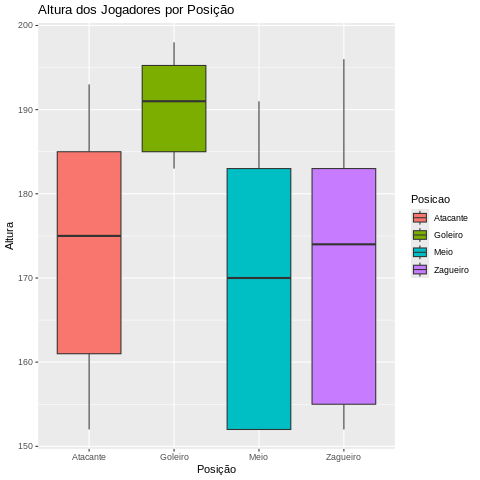

In [53]:
#4.2 Comparando a Altura por cada posição
%%R
fifa %>%
  pivot_longer(cols = c(Goleiro, Zagueiro, Meio, Atacante), names_to = "Posicao", values_to = "Valor") %>%
  filter(Valor == 1) %>%
  ggplot(aes(x = Posicao, y = height_cm, fill = Posicao)) +
  geom_boxplot() +
  labs(title = "Altura dos Jogadores por Posição", x = "Posição", y = "Altura")

# Podemos ver uma grande diferença nesse gráfico baseado na posição, o que faz sentido. A posição de goleiro apresenta as maiores alturas,
# se torna bem fácil visualizar isso quando se entende da ideia do boxplot.

# 5. Um histograma ou gráfico de barra para verificação de adequabilidade do modelo probabilístico para a variável escolhida.

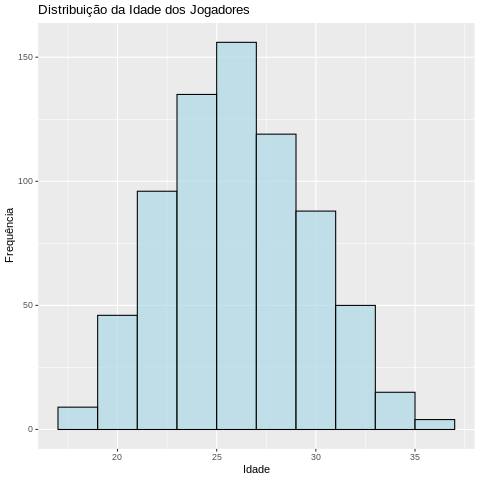

In [66]:
# A coluna escolhida foi a "age", e montar um histograma.

%%R
fifa %>%
  ggplot(aes(x = age)) +
  # binwidth -> são as larguras dos intervalos. Irei definir como 2 anos.
  geom_histogram(binwidth = 2, color = "black", fill = "lightblue", alpha = 0.7) +
  labs(title = "Distribuição da Idade dos Jogadores",x = "Idade", y = "Frequência")

# Podemos analisar claramente que os dados se encaixam muito bem em uma curva Normal.
# O diagrama mostra uma distribuição aproximadamente simétrica.